<img src="https://raw.githubusercontent.com/paular143/images_notebooks/master/logo-sin-nombre.png" alt="Universidad de Los Andes" style="width: 90px;" align="left" frameborder="300"/>

**UNIVERSIDAD DE LOS ANDES** <br>
**FACULTAD DE ECONOMÍA - EDUCACIÓN CONTINUADA** <br>
**Análisis espacial de datos y sus aplicaciones en Python** <br>
**PROFESORES:** Germán González y Andrés Camacho <br><br>




# Parte 1 - Puntos, línea & polígonos

In [1]:
!pip3 install geopandas
!pip3 install shapely
!pip3 install numpy
!pip3 install folium
!pip3 install geojson
!pip3 install branca


from shapely import geometry, ops
import numpy as np
import shapely.geometry as shg
from shapely.geometry.polygon import Polygon
from shapely.geometry import Point
import random
import pandas as pd
import geopandas as gpd
import folium
import json
import geojson
from shapely.ops import cascaded_union
import branca
import re
import string
import unicodedata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.3 MB/s eta 0:00:00:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 14.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 8.1 MB/s eta 0:00:00
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -

# A. Figuras 

## 1. Punto

El objeto construido representa un punto en la superficie terrestre. Este está compuesto por una latitud y una longitud.


In [26]:
Punto_geojson = { "type": "Point", 
    "coordinates": [-74.067054,4.600158]
}

In [27]:
Latitud = 4.600158
Longitud = -74.067054

In [28]:
Punto_bogota = Point(Latitud, Longitud)

In [29]:
type(Punto_bogota)

shapely.geometry.point.Point

In [30]:
Punto_geojson

{'type': 'Point', 'coordinates': [-74.067054, 4.600158]}

## Forma 1: Geojson

In [31]:
mapa = folium.Map(location=[Latitud,Longitud],zoom_start=15,tiles='cartodbpositron')

### --- Geojson -- ### 
folium.GeoJson(Punto_geojson,name='Capa geojson').add_to(mapa)

    
### --- Diferents tile formats --- ### 
folium.TileLayer('Stamen Terrain').add_to(mapa)
folium.TileLayer('openstreetmap').add_to(mapa)
folium.TileLayer('Stamen Toner').add_to(mapa)


folium.LayerControl().add_to(mapa)

In [12]:
mapa

## Forma 2: Marcador

In [32]:
mapa = folium.Map(location=[Latitud,Longitud],zoom_start=15,tiles='openstreetmap')

### ------- Agregar una marca de un punto a un mapa ------ ######## 
icon = folium.features.CustomIcon('https://upload.wikimedia.org/wikipedia/commons/4/47/University_of_Los_Andes_logo.svg',icon_size=(50,50)) 


html_format = ''' <center> <h1> Universidad de los Andes </h1> </center>'''
popup = folium.Popup(html=folium.IFrame(html=html_format,width='400px',height='280px'), max_width=500,parse_html=True)

folium.Marker(
    [Latitud,Longitud],icon=icon,
    popup=popup
).add_to(mapa)

#mapa

In [14]:
mapa

## 2. Multi punto 

Estructura 

In [15]:
Multiples_puntos = { "type": "MultiPoint", 
    "coordinates": [[-74.07419209899996, 4.836546038000051],
 [-74.07401214999999, 4.836470460000044],
 [-74.07397948799996, 4.836456742000053],
 [-74.07370733999994, 4.836316417000035],
 [-74.07335865799996, 4.836052776000031],
 [-74.07297595099999, 4.8357593710000515],
 [-74.07269530499997, 4.8355042330000515],
 [-74.07249119299996, 4.835308632000022],
 [-74.07229559099994, 4.835108773000059],
 [-74.07207872499998, 4.834879151000052]]
}

## Representación

In [16]:
mapa = folium.Map(location=[4.836546038000051,-74.07419209899996],zoom_start=20,tiles='cartodbpositron')

######## ---------- Puntos ------ #######
folium.GeoJson(Multiples_puntos).add_to(mapa)

In [17]:
mapa

# 3 línea 

El objeto LineString construido representa una o más splines lineales conectadas entre los puntos. Un LineString puede cruzarse (es decir, ser complejo y no simple).


In [18]:
Linea_puntos = { "type": "LineString", 
    "coordinates": [[-74.07419209899996, 4.836546038000051],
 [-74.07401214999999, 4.836470460000044],
 [-74.07397948799996, 4.836456742000053],
 [-74.07370733999994, 4.836316417000035],
 [-74.07335865799996, 4.836052776000031],
 [-74.07297595099999, 4.8357593710000515],
 [-74.07269530499997, 4.8355042330000515],
 [-74.07249119299996, 4.835308632000022],
 [-74.07229559099994, 4.835108773000059],
 [-74.07207872499998, 4.834879151000052]]
}

In [19]:
mapa = folium.Map(location=[4.836546038000051,-74.072],zoom_start=20,tiles='cartodbpositron')

######## ---------- Puntos ------ #######
folium.GeoJson(Linea_puntos).add_to(mapa)

In [20]:
mapa

In [21]:
Multilinea = { "type": "MultiLineString", 
    "coordinates": [
        [[-74.07419209899996, 4.836546038000051],
 [-74.07401214999999, 4.836470460000044],
 [-74.07397948799996, 4.836456742000053],
 [-74.07370733999994, 4.836316417000035],
 [-74.07335865799996, 4.836052776000031],
 [-74.07297595099999, 4.8357593710000515],
 [-74.07269530499997, 4.8355042330000515],
 [-74.07249119299996, 4.835308632000022],
 [-74.07229559099994, 4.835108773000059],
 [-74.07207872499998, 4.834879151000052]], 
        [[-74.07, 4.836546038000051],
 [-74.07, 4.836470460000044],
 [-74.07, 4.836456742000053],
 [-74.07, 4.836316417000035],
 [-74.07, 4.836052776000031],
 [-74.07, 4.8357593710000515],
 [-74.07, 4.8355042330000515],
 [-74.07, 4.835308632000022],
 [-74.07, 4.835108773000059],
 [-74.07, 4.834879151000052]]
    ]
}

In [22]:
mapa = folium.Map(location=[4.836546038000051,-74.072],zoom_start=20,tiles='cartodbpositron')

######## ---------- Puntos ------ #######
folium.GeoJson(Multilinea).add_to(mapa)

# 4. Polígono

El objeto construido representa una figura geométrica plana compuesta por una secuencia finita de segmentos rectos consecutivos que encierran una región en el plano.

In [23]:
Poligono = {"type": "Polygon","coordinates": [[[-74.098062, 4.739282], [-74.097989, 4.739255], 
                                          [-74.097986, 4.739254], [-74.098152, 4.738795], 
                                          [-74.098228, 4.738822], [-74.098241, 4.738827], 
                                          [-74.098253, 4.738832], [-74.098279, 4.738841], 
                                          [-74.098286, 4.738844], [-74.098355, 4.73887], 
                                          [-74.098355, 4.73887], [-74.09836, 4.738871], 
                                          [-74.098406, 4.738888], [-74.098438, 4.738899], 
                                          [-74.098457, 4.738906],
                                          [-74.09846, 4.738907], [-74.09846, 4.738907], [-74.09846, 4.738907], 
                                          [-74.098454, 4.738922], [-74.09845, 4.738934], [-74.09844, 4.73896], [-74.09843, 4.738985], [-74.098428, 4.738992], 
                                          [-74.098401, 4.739061], [-74.098401, 4.739061], [-74.0984, 4.739064], [-74.0984, 4.739066], [-74.098386, 4.739105],
                                          [-74.098385, 4.739111], [-74.098375, 4.739136], [-74.098359, 4.73918], [-74.098347, 4.739212], [-74.098334, 4.739244], 
                                          [-74.098309, 4.739314], [-74.098212, 4.739279], [-74.09821, 4.739278], [-74.098207, 4.739277], [-74.09819, 4.739325], 
                                          [-74.098189, 4.739328], [-74.098166, 4.73932], [-74.098158, 4.739317], [-74.098134, 4.739308], [-74.098091, 4.739292], 
                                          [-74.098087, 4.739291], [-74.098078, 4.739287], [-74.098075, 4.739286], [-74.098065, 4.739283], [-74.098062, 4.739282]]]}

In [24]:
mapa = folium.Map(location=[4.739282,-74.098062],zoom_start=22,tiles='cartodbpositron')

######## ---------- Puntos ------ #######
folium.GeoJson(Poligono).add_to(mapa)

In [25]:
mapa

## B. Operaciones Figuras

In [3]:
File= 'MPM/MPM_FuenteCensal_2018.shp'
Datos_dane = gpd.read_file(File)
print(Datos_dane.crs)
#### ---  EPSG:4326 -> WGS84 ---- ## 
# Re proyectar las figuras a un sistema epsg 
# epsg=4326: Es el código EPSG para el sistema de referencia de coordenadas WGS 84. }
# WGS 84 es el sistema de referencia utilizado por el Sistema de Posicionamiento Global (GPS).
# Las coordenadas en este sistema se dan en grados de latitud y longitud. 
# Es uno de los sistemas de referencia más comunes y es ampliamente utilizado en aplicaciones de mapeo y GIS.
Datos_dane.to_crs(epsg=4326, inplace=True)

EPSG:4686


In [4]:
Datos_dane.head()

DPTO_CCDGO MPIO_CCDGO              MPIO_CNMBR MPIO_CCNCT DPTO_CNMBR   MPM   
0         18        001               FLORENCIA      18001    CAQUETÁ  29.6  \
1         18        029                 ALBANIA      18029    CAQUETÁ  38.8   
2         18        094  BELÉN DE LOS ANDAQUÍES      18094    CAQUETÁ  50.0   
3         18        247             EL DONCELLO      18247    CAQUETÁ  44.3   
4         18        256               EL PAUJÍL      18256    CAQUETÁ  45.5   

   MPM_CAB  MPM_CPRD  AFBMO_TOT  AFBMO_CAB  ...  SAS_TOT  SAS_CAB  SAS_CPRD   
0     27.2      53.3        9.1        8.4  ...     20.4     20.5      19.0  \
1     26.6      48.9       12.1        9.1  ...     12.0     11.7      12.3   
2     41.4      66.1       18.4       16.8  ...     16.6     16.7      16.4   
3     37.6      60.7       14.7       13.5  ...     14.1     14.4      13.5   
4     40.3      53.4       14.7       15.0  ...     12.7     12.9      12.5   

   TRINF_TOT  TRINF_CAB  TRINF_CPRD  TRIML_TOT  TRIML_CAB  TRIML_CPRD   
0        1.4        1.2         3.3       85.0       84.4        91.5  \
1        1.9        1.6         2.2       88.1       85.5        90.4   
2        1.9        1.1         3.7       88.6       87.0        92.0   
3        1.9        1.3         3.7       90.7       89.3        94.4   
4        2.6        2.3         2.9       90.0       87.6        93.4   

                                            geometry  
0  POLYGON ((-75.42074 2.19413, -75.42042 2.19412...  
1  POLYGON ((-75.89506 1.36570, -75.89506 1.36570...  
2  POLYGON ((-75.78705 1.74982, -75.78715 1.74956...  
3  POLYGON ((-75.36167 2.32143, -75.36142 2.32122...  
4  POLYGON ((-75.36638 2.20952, -75.35963 2.17388...  

[5 rows x 54 columns]

In [5]:
#### -------- Solo nos concentramos en las variables geográficas --- ######
Datos_dane=Datos_dane[['MPIO_CCNCT','DPTO_CNMBR','MPIO_CNMBR','geometry']]
#### ---------- Cambiamos el nombre --------- ######### 
Datos_dane.columns = ['Codigo','Departamento','Municipio','Figura']
Datos_dane

Codigo  Departamento               Municipio   
0     18001       CAQUETÁ               FLORENCIA  \
1     18029       CAQUETÁ                 ALBANIA   
2     18094       CAQUETÁ  BELÉN DE LOS ANDAQUÍES   
3     18247       CAQUETÁ             EL DONCELLO   
4     18256       CAQUETÁ               EL PAUJÍL   
...     ...           ...                     ...   
1117  25290  CUNDINAMARCA              FUSAGASUGÁ   
1118  25662  CUNDINAMARCA     SAN JUAN DE RIOSECO   
1119  73349        TOLIMA                   HONDA   
1120  05631     ANTIOQUIA                SABANETA   
1121  05380     ANTIOQUIA             LA ESTRELLA   

                                                 Figura  
0     POLYGON ((-75.42074 2.19413, -75.42042 2.19412...  
1     POLYGON ((-75.89506 1.36570, -75.89506 1.36570...  
2     POLYGON ((-75.78705 1.74982, -75.78715 1.74956...  
3     POLYGON ((-75.36167 2.32143, -75.36142 2.32122...  
4     POLYGON ((-75.36638 2.20952, -75.35963 2.17388...  
...                                                 ...  
1117  POLYGON ((-74.29700 4.42407, -74.29696 4.42384...  
1118  POLYGON ((-74.72826 4.96905, -74.72815 4.96899...  
1119  POLYGON ((-74.82173 5.31671, -74.82156 5.31653...  
1120  POLYGON ((-75.60355 6.15510, -75.60350 6.15506...  
1121  POLYGON ((-75.65229 6.17061, -75.65216 6.17060...  

[1122 rows x 4 columns]

## Eliminamos las tildes de los nombres que componen el mapa 

In [7]:
def Arreglar_tilde(Texto):
    Texto = unicodedata.normalize('NFD', Texto) #Normal Form Decomposed
    Texto = Texto.encode('ascii', 'ignore')
    Texto = Texto.decode("utf-8")
    return(Texto)

In [8]:
###### -------- Para Departamento ------- ######
Datos_dane['Departamento'] = Datos_dane['Departamento'].apply(lambda x: Arreglar_tilde(Texto=x))
###### -------- Para Municipio ------- ######
Datos_dane['Municipio'] = Datos_dane['Municipio'].apply(lambda x: Arreglar_tilde(Texto=x))

In [9]:
Datos_dane

Codigo  Departamento               Municipio   
0     18001       CAQUETA               FLORENCIA  \
1     18029       CAQUETA                 ALBANIA   
2     18094       CAQUETA  BELEN DE LOS ANDAQUIES   
3     18247       CAQUETA             EL DONCELLO   
4     18256       CAQUETA               EL PAUJIL   
...     ...           ...                     ...   
1117  25290  CUNDINAMARCA              FUSAGASUGA   
1118  25662  CUNDINAMARCA     SAN JUAN DE RIOSECO   
1119  73349        TOLIMA                   HONDA   
1120  05631     ANTIOQUIA                SABANETA   
1121  05380     ANTIOQUIA             LA ESTRELLA   

                                                 Figura  
0     POLYGON ((-75.42074 2.19413, -75.42042 2.19412...  
1     POLYGON ((-75.89506 1.36570, -75.89506 1.36570...  
2     POLYGON ((-75.78705 1.74982, -75.78715 1.74956...  
3     POLYGON ((-75.36167 2.32143, -75.36142 2.32122...  
4     POLYGON ((-75.36638 2.20952, -75.35963 2.17388...  
...                                                 ...  
1117  POLYGON ((-74.29700 4.42407, -74.29696 4.42384...  
1118  POLYGON ((-74.72826 4.96905, -74.72815 4.96899...  
1119  POLYGON ((-74.82173 5.31671, -74.82156 5.31653...  
1120  POLYGON ((-75.60355 6.15510, -75.60350 6.15506...  
1121  POLYGON ((-75.65229 6.17061, -75.65216 6.17060...  

[1122 rows x 4 columns]

Nos concentramos en el Polígono de Bogotá

In [12]:
Bogota_shape = Datos_dane[Datos_dane['Municipio'].str.contains('BOG')]

In [23]:
pd.Series.str.contains?

Signature:
pd.Series.str.contains(
    self,
    pat,
    case: 'bool' = True,
    flags: 'int' = 0,
    na=None,
    regex: 'bool' = True,
)
Docstring:
Test if pattern or regex is contained within a string of a Series or Index.

Return boolean Series or Index based on whether a given pattern or regex is
contained within a string of a Series or Index.

Parameters
----------
pat : str
    Character sequence or regular expression.
case : bool, default True
    If True, case sensitive.
flags : int, default 0 (no flags)
    Flags to pass through to the re module, e.g. re.IGNORECASE.
na : scalar, optional
    Fill value for missing values. The default depends on dtype of the
    array. For object-dtype, ``numpy.nan`` is used. For ``StringDtype``,
    ``pandas.NA`` is used.
regex : bool, default True
    If True, assumes the pat is a regular expression.

    If False, treats the pat as a literal string.

Returns
-------
Series or Index of boolean values
    A Series or Index of boolean value

In [18]:
Bogota_shape

Codigo  Departamento     Municipio   
908  11001  BOGOTA, D.C.  BOGOTA, D.C.  \

                                                Figura  
908  POLYGON ((-74.07419 4.83655, -74.07401 4.83647...

In [19]:
### ---- Polígono ---- #
Bogota_poligono = Bogota_shape['Figura'].iloc[0]

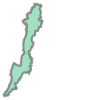

In [20]:
Bogota_poligono

## Shape a Geojson

In [34]:
#### ------ Crear geojson ----- ###### 
geojson_bogota = geojson.Feature(geometry=Bogota_poligono)
### ----- Organizar la estructura ---- ###
geo_str = json.dumps(geojson_bogota) 
####### ------- Cargarlo ----- #######
geo_str = json.loads(geo_str)

In [35]:
Mapa = folium.Map(location=[4.316107698094774,-74.18107270162268],zoom_start=9,tiles='cartodbpositron')

####----- Agregamos la capa geojson ---- #####
folium.GeoJson(geo_str,
style_function=lambda feature: {
    'fillColor': 'red',
    'color': '#000000',
    'weight': 2,
    'fillOpacity':0.1,
},
highlight_function=lambda x: {'weight':1,'fillColor':'green','color': 'yellow'},tooltip='',
name='Capa ').add_to(Mapa)

# Puntico de los Andes (antes)
folium.GeoJson(Punto_geojson,name='Capa geojson').add_to(Mapa)

    
### --- Diferents tile formats --- ### 
folium.TileLayer('Stamen Terrain').add_to(Mapa)
folium.TileLayer('openstreetmap').add_to(Mapa)
folium.TileLayer('Stamen Toner').add_to(Mapa)


folium.LayerControl().add_to(Mapa)


In [36]:
Mapa

## Buffer

Crea una nueva capa que recubre este en una zona de influencia cuyo radio es el indicado en la herramienta de análisis. Muestran el área que está dentro de cierta distancia del polígono de entrada.     

Particularmente permite obtener nueva información para determinar qué elementos geográficos se encuentran dentro de un área de influencia determinada. 

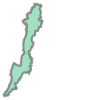

In [37]:
Bogota_poligono

In [38]:
Buffering = Bogota_poligono.buffer(0.01)

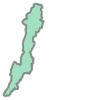

In [39]:
Buffering

In [41]:
import math

def grados_a_km(latitud):
    # Convertir la latitud de grados a radianes
    latitud_rad = math.radians(latitud)
    
    # Calcular la distancia en km para 0.01 grados de longitud
    distancia = 111.32 * math.cos(latitud_rad) * 0.01
    
    return distancia

# Por ejemplo, para Bogotá (latitud aproximada 4.6 grados):
km = grados_a_km(0.01)
print(f"0.01 grados en la latitud de Bogotá es aproximadamente {km:.2f} km.")


0.01 grados en la latitud de Bogotá es aproximadamente 1.11 km.


In [42]:
Mapa = folium.Map(location=[4.316107698094774,-74.18107270162268],zoom_start=9,tiles='cartodbpositron')

geo_str2 = json.loads(json.dumps(geojson.Feature(geometry=Buffering)) )
####----- Agregamos la capa geojson ---- #####
folium.GeoJson(geo_str2,
style_function=lambda feature: {
    'fillColor': 'gray',
    'color': '#7d868c',
    'weight': 1,
    'fillOpacity':0.2,
},
highlight_function=lambda x: {'weight':10,'fillColor':'#fec821','color': '#fec821'},tooltip='Buffer',
name='Capa Buffer').add_to(Mapa)
#Bogota sin buffer: 
folium.GeoJson(geo_str,
style_function=lambda feature: {
    'fillColor': 'red',
    'color': '#000000',
    'weight': 2,
    'fillOpacity':0.1,
},
highlight_function=lambda x: {'weight':1,'fillColor':'green','color': 'yellow'},tooltip='Bogota',
name='Capa ').add_to(Mapa)


folium.LayerControl().add_to(Mapa)



In [43]:
Mapa

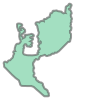

In [54]:
buffer_turbo 

In [57]:
# Ejercicio práctico: Turbo, Antioquia? #
# 8.067422, -76.800963
turbo = Datos_dane[(Datos_dane['Municipio'] == 'TURBO') & (Datos_dane['Departamento'] == 'ANTIOQUIA')]
turbo_poligono=turbo['Figura'].iloc[0]
# Crear un buffer alrededor del municipio
buffer_turbo = turbo_poligono.buffer(0.01)
# Crear un mapa centrado en Turbo
centro = turbo_poligono.centroid
geo_turb1 = json.loads(json.dumps(geojson.Feature(geometry=turbo_poligono)))
geo_turb2 = json.loads(json.dumps(geojson.Feature(geometry=buffer_turbo)))
m = folium.Map(location=[centro.y, centro.x], zoom_start=10, tiles='cartodbpositron')
# Agregar el municipio Turbo al mapa
folium.GeoJson(geo_turb1, 
               style_function=lambda x: {'fillColor': 'blue', 'color': 'blue', 'weight': 2, 'fillOpacity': 0.3},
               name='Turbo').add_to(m)

# Agregar el buffer al mapa
folium.GeoJson(geo_turb2, 
               style_function=lambda x: {'fillColor': 'red', 'color': 'red', 'weight': 2, 'fillOpacity': 0.3},
               name='Buffer').add_to(m)

# Agregar control de capas
folium.LayerControl().add_to(m)

# Mostrar el mapa
m


## Unión 

In [58]:
CASANARE = Datos_dane[Datos_dane['Departamento'] == 'CASANARE']

In [33]:
CASANARE

Codigo Departamento             Municipio  \
189  85001     CASANARE                 YOPAL   
190  85010     CASANARE               AGUAZUL   
191  85015     CASANARE               CHAMEZA   
192  85136     CASANARE             LA SALINA   
193  85139     CASANARE                  MANI   
194  85162     CASANARE             MONTERREY   
195  85225     CASANARE               NUNCHIA   
196  85230     CASANARE                OROCUE   
197  85263     CASANARE                  PORE   
198  85279     CASANARE               RECETOR   
199  85300     CASANARE           SABANALARGA   
200  85315     CASANARE                SACAMA   
201  85325     CASANARE  SAN LUIS DE PALENQUE   
202  85400     CASANARE                TAMARA   
203  85410     CASANARE             TAURAMENA   
204  85430     CASANARE              TRINIDAD   
205  85440     CASANARE            VILLANUEVA   
206  85125     CASANARE          HATO COROZAL   
207  85250     CASANARE        PAZ DE ARIPORO   

                                                Figura  
189  POLYGON ((-72.39513 5.56853, -72.39493 5.56837...  
190  POLYGON ((-72.56545 5.36972, -72.56507 5.36965...  
191  POLYGON ((-72.81017 5.36660, -72.81033 5.36589...  
192  POLYGON ((-72.33885 6.34471, -72.33920 6.34454...  
193  POLYGON ((-72.34155 5.06495, -72.34119 5.06475...  
194  POLYGON ((-72.89989 5.03466, -72.89939 5.03454...  
195  POLYGON ((-72.19558 5.71924, -72.19499 5.71898...  
196  POLYGON ((-71.50965 5.21730, -71.50955 5.21722...  
197  POLYGON ((-72.04587 5.83819, -72.04521 5.83779...  
198  POLYGON ((-72.80501 5.38093, -72.80384 5.38066...  
199  POLYGON ((-73.01487 5.00174, -73.01511 5.00141...  
200  POLYGON ((-72.27117 6.13031, -72.27104 6.13020...  
201  POLYGON ((-71.91466 5.54338, -71.91432 5.54294...  
202  POLYGON ((-72.07143 6.06339, -72.07008 6.06170...  
203  POLYGON ((-72.75737 5.18477, -72.75726 5.18476...  
204  POLYGON ((-71.70963 5.56822, -71.70923 5.56806...  
205  POLYGON ((-72.82487 4.70321, -72.82435 4.70319...  
206  POLYGON ((-70.36140 6.29907, -70.36045 6.29853...  
207  POLYGON ((-70.32197 6.12618, -70.32158 6.12588...

<Axes: >

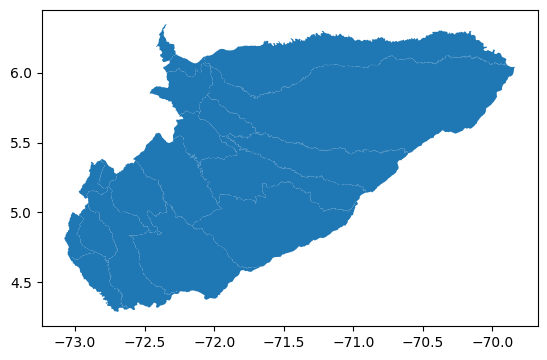

In [59]:
gpd.GeoDataFrame(CASANARE,geometry='Figura').plot()

In [94]:
#### ------ Se unen todos los municipios de casanare ----- #### 

In [69]:
#Opcion A
Departamento_casanare = cascaded_union(CASANARE['Figura'])
#Opcion B
# Unir todos los municipios para obtener un único polígono de Casanare
casanare_poligono = CASANARE['Figura'].unary_union

/var/folders/m8/p0y07mnx0xj8nxd8l9zj7fn00000gn/T/ipykernel_14756/3873506083.py:2: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  Departamento_casanare = cascaded_union(CASANARE['Figura'])


In [75]:
Departamento_casanare = cascaded_union(CASANARE['Figura']).buffer(0)

/var/folders/m8/p0y07mnx0xj8nxd8l9zj7fn00000gn/T/ipykernel_14756/1315028665.py:1: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  Departamento_casanare = cascaded_union(CASANARE['Figura']).buffer(0)


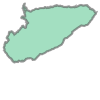

In [71]:
casanare_poligono 

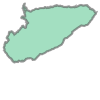

In [72]:
Departamento_casanare

In [74]:
print(casanare_poligono.equals(Departamento_casanare))

True


In [63]:
type(Departamento_casanare)

shapely.geometry.polygon.Polygon

<AxesSubplot:>

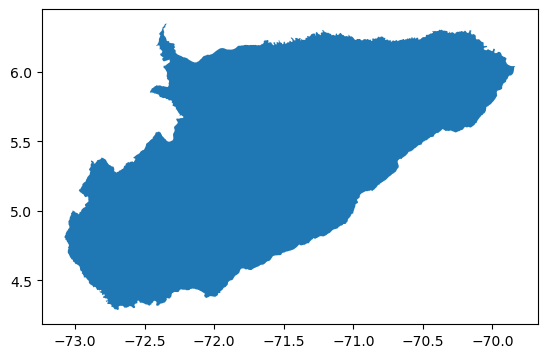

In [50]:
gpd.GeoSeries(Departamento_casanare).plot()

In [52]:
#### ---- Aguazul ----- #####
Aguazul = CASANARE.iloc[1]['Figura']

In [55]:
Mapa = folium.Map(location=[5.4040642366943406,-71.60188072583267],zoom_start=9,tiles='cartodbpositron')

###### ---------- Capa casanare --------- ########
geo_str = json.loads(json.dumps(geojson.Feature(geometry=Departamento_casanare)) )
####----- Agregamos la capa geojson ---- #####
folium.GeoJson(geo_str,
style_function=lambda feature: {
    'fillColor': 'gray',
    'color': '#7d868c',
    'weight': 1,
    'fillOpacity':0.2,
},
highlight_function=lambda x: {'weight':10,'fillColor':'#fec821','color': '#fec821'},tooltip='Parado en Casanare',
name='Capa Casanare').add_to(Mapa)



##### --------- Capa Aguazul -------- #######
geo_str_aguazul = json.loads(json.dumps(geojson.Feature(geometry=Aguazul)) )
####----- Agregamos la capa geojson ---- #####
folium.GeoJson(geo_str_aguazul,
style_function=lambda feature: {
    'fillColor': 'red',
    'color': '#7d868c',
    'weight': 1,
    'fillOpacity':0.2,
},
highlight_function=lambda x: {'weight':10,'fillColor':'#fec821','color': '#fec821'},tooltip='Aguazul',
name='Capa Aguazul').add_to(Mapa)

###### ----- 
folium.LayerControl().add_to(Mapa)




In [62]:
Mapa

## Centro

In [57]:
Centro_casanare = Departamento_casanare.centroid

In [58]:
Cordenadas_centro = Centro_casanare.coords[0]

In [59]:
Centro_casanare.coords[0]

(-71.60188072583284, 5.404064236694325)

In [60]:
Centro_casanare.x

-71.60188072583284

In [61]:
Centro_casanare.y

5.404064236694325

In [71]:
Mapa = folium.Map(location=[Cordenadas_centro[1],Cordenadas_centro[0]],zoom_start=9,tiles='cartodbpositron')

geo_str = json.loads(json.dumps(geojson.Feature(geometry=Departamento_casanare)) )
####----- Agregamos la capa geojson ---- #####
folium.GeoJson(geo_str,
style_function=lambda feature: {
    'fillColor': 'gray',
    'color': '#7d868c',
    'weight': 1,
    'fillOpacity':0.2,
},
highlight_function=lambda x: {'weight':10,'fillColor':'#fec821','color': '#fec821'},tooltip='Casanare',
name='Capa Casanare').add_to(Mapa)

folium.LayerControl().add_to(Mapa)



In [72]:
Mapa

## Intersección

In [73]:
Aguazul = CASANARE.iloc[1]['Figura']
Interseccion = Departamento_casanare.intersection(Aguazul)

In [74]:
Mapa = folium.Map(location=[Cordenadas_centro[1],Cordenadas_centro[0]],zoom_start=9,tiles='cartodbpositron')

geo_str = json.loads(json.dumps(geojson.Feature(geometry=Interseccion)) )
####----- Agregamos la capa geojson ---- #####
folium.GeoJson(geo_str,
style_function=lambda feature: {
    'fillColor': 'gray',
    'color': '#7d868c',
    'weight': 1,
    'fillOpacity':0.2,
},
highlight_function=lambda x: {'weight':10,'fillColor':'#fec821','color': '#fec821'},tooltip='Inter - Aguazul',
name='Capa Aguazul').add_to(Mapa)

folium.LayerControl().add_to(Mapa)



In [82]:
Mapa

## Diferencia

In [76]:
Differencia = Departamento_casanare.difference(Aguazul)

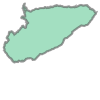

In [77]:
Departamento_casanare

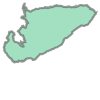

In [78]:
Differencia

In [79]:


Mapa = folium.Map(location=[Cordenadas_centro[1],Cordenadas_centro[0]],zoom_start=9,tiles='cartodbpositron')

geo_str = json.loads(json.dumps(geojson.Feature(geometry=Differencia)) )
####----- Agregamos la capa geojson ---- #####
folium.GeoJson(geo_str,
style_function=lambda feature: {
    'fillColor': 'gray',
    'color': '#7d868c',
    'weight': 1,
    'fillOpacity':0.2,
},
highlight_function=lambda x: {'weight':10,'fillColor':'#fec821','color': '#fec821'},tooltip='Casanare',
name='Capa').add_to(Mapa)

folium.LayerControl().add_to(Mapa)


## Contorno exterior

In [83]:
Contorno = Departamento_casanare.exterior

In [84]:
##### Se construye un linestring con las cordenadas del contorno 
Contorno_exterior = { "type": "LineString", 
    "coordinates": list(Contorno.coords)
}



In [85]:

Mapa = folium.Map(location=[Cordenadas_centro[1],Cordenadas_centro[0]],zoom_start=9,tiles='cartodbpositron')
####----- Agregamos la capa geojson ---- #####
folium.GeoJson(Contorno_exterior,
style_function=lambda feature: {
    'fillColor': 'gray',
    'color': '#7d868c',
    'weight': 1,
    'fillOpacity':0.2,
},
highlight_function=lambda x: {'weight':10,'fillColor':'#fec821','color': '#fec821'},tooltip='Casanare',
name='Capa').add_to(Mapa)

folium.LayerControl().add_to(Mapa)

In [86]:
Mapa

## Evaluación Dentro 

In [87]:
Latitude = 5.1710161673326525
Longitude = -72.55019544090041

Punto_evaluar = Point(Longitude,Latitude)

Evaluación de punto dentro de Aguazul

In [88]:
Punto_evaluar.within(Aguazul)

True

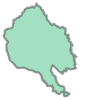

In [89]:
Aguazul

In [90]:
Datos_dane

Codigo  Departamento               Municipio  \
0     18001       CAQUETA               FLORENCIA   
1     18029       CAQUETA                 ALBANIA   
2     18094       CAQUETA  BELEN DE LOS ANDAQUIES   
3     18247       CAQUETA             EL DONCELLO   
4     18256       CAQUETA               EL PAUJIL   
...     ...           ...                     ...   
1117  25290  CUNDINAMARCA              FUSAGASUGA   
1118  25662  CUNDINAMARCA     SAN JUAN DE RIOSECO   
1119  73349        TOLIMA                   HONDA   
1120  05631     ANTIOQUIA                SABANETA   
1121  05380     ANTIOQUIA             LA ESTRELLA   

                                                 Figura  
0     POLYGON ((-75.42074 2.19413, -75.42042 2.19412...  
1     POLYGON ((-75.89506 1.36570, -75.89506 1.36570...  
2     POLYGON ((-75.78705 1.74982, -75.78715 1.74956...  
3     POLYGON ((-75.36167 2.32143, -75.36142 2.32122...  
4     POLYGON ((-75.36638 2.20952, -75.35963 2.17388...  
...                                                 ...  
1117  POLYGON ((-74.29700 4.42407, -74.29696 4.42384...  
1118  POLYGON ((-74.72826 4.96905, -74.72815 4.96899...  
1119  POLYGON ((-74.82173 5.31671, -74.82156 5.31653...  
1120  POLYGON ((-75.60355 6.15510, -75.60350 6.15506...  
1121  POLYGON ((-75.65229 6.17061, -75.65216 6.17060...  

[1122 rows x 4 columns]

In [128]:
Datos_dane[Datos_dane.apply(lambda x: Punto_evaluar.within(x['Figura']),axis=1)]

Codigo Departamento Municipio  \
190  85010     CASANARE   AGUAZUL   

                                                Figura  
190  POLYGON ((-72.56545 5.36972, -72.56507 5.36965...

In [106]:
Datos_dane[Datos_dane.apply(lambda x: Punto_bogota.within(x['Figura']),axis=1)]

Empty GeoDataFrame
Columns: [Codigo, Departamento, Municipio, Figura]
Index: []

Evaluación de punto dentro de Aguazul

In [91]:
Punto_evaluar.within(Departamento_casanare)

True

Evaluación de punto dentro de la differencia de Casanare - Aguazul

In [92]:
Punto_evaluar.within(Differencia)

False

Evaluación de punto dentro de Aguazul

In [93]:
Punto_evaluar.within(Bogota_poligono)

False

## Simplifación

In [115]:
Bogota_simplificada = Bogota_poligono.simplify(0.02)

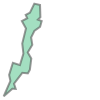

In [116]:
Bogota_simplificada

In [109]:

Mapa = folium.Map(location=[Bogota_poligono.centroid.coords[0][1],Bogota_poligono.centroid.coords[0][0]],zoom_start=9,tiles='cartodbpositron')

geo_str = json.loads(json.dumps(geojson.Feature(geometry=Bogota_simplificada)) )
####----- Agregamos la capa geojson ---- #####
folium.GeoJson(geo_str,
style_function=lambda feature: {
    'fillColor': 'gray',
    'color': '#7d868c',
    'weight': 1,
    'fillOpacity':0.2,
},
highlight_function=lambda x: {'weight':10,'fillColor':'#fec821','color': '#fec821'},tooltip='Casanare',
name='Capa').add_to(Mapa)

folium.LayerControl().add_to(Mapa)

In [110]:
Mapa

## Figura Convexa

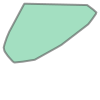

In [117]:
Departamento_casanare.convex_hull

In [118]:
Casanare_convexo = Departamento_casanare.convex_hull

In [119]:

Mapa = folium.Map(location=[Casanare_convexo.centroid.coords[0][1],Casanare_convexo.centroid.coords[0][0]],zoom_start=9,tiles='cartodbpositron')

geo_str = json.loads(json.dumps(geojson.Feature(geometry=Casanare_convexo)) )
####----- Agregamos la capa geojson ---- #####
folium.GeoJson(geo_str,
style_function=lambda feature: {
    'fillColor': 'gray',
    'color': '#7d868c',
    'weight': 1,
    'fillOpacity':0.2,
},
highlight_function=lambda x: {'weight':10,'fillColor':'#fec821','color': '#fec821'},tooltip='Casanare',
name='Capa').add_to(Mapa)

folium.LayerControl().add_to(Mapa)

In [120]:
Mapa

## Cargar datos desde un csv 

In [121]:
Datos_csv = pd.read_csv('ged211.csv')

/var/folders/m8/p0y07mnx0xj8nxd8l9zj7fn00000gn/T/ipykernel_46505/4087875973.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  Datos_csv = pd.read_csv('ged211.csv')


In [122]:
Datos_csv.head()

id               relid  year  active_year code_status  \
0  244657  IRQ-2017-1-524-322  2017            1       Clear   
1  132140    AFG-1989-1-411-2  1989            1       Clear   
2  130364   AFG-1989-1-411-37  1989            1       Clear   
3  130359    AFG-1989-1-411-4  1989            1       Clear   
4  133883   AFG-1989-1-411-39  1989            1       Clear   

   type_of_violence  conflict_dset_id  conflict_new_id  \
0                 1               259              259   
1                 1               333              333   
2                 1               333              333   
3                 1               333              333   
4                 1               333              333   

             conflict_name  dyad_dset_id  ...                 date_end  \
0         Iraq: Government           524  ...  2017-07-31 00:00:00.000   
1  Afghanistan: Government           724  ...  1989-01-13 00:00:00.000   
2  Afghanistan: Government           724  ...  1989-01-18 00:00:00.000   
3  Afghanistan: Government           724  ...  1989-01-24 00:00:00.000   
4  Afghanistan: Government           724  ...  1989-02-05 00:00:00.000   

  deaths_a  deaths_b  deaths_civilians deaths_unknown  best  high  low  gwnoa  \
0        0         4                 0              2     6     6    6    645   
1        6         0                 0              0     6     6    6    700   
2        0         0                 0              4     4     4    0    700   
3        0         0                 0            600   600   600  600    700   
4        0         0                 0              2     2     2    0    700   

  gwnob  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN  

[5 rows x 49 columns]

In [126]:
len(Datos_csv)

261864

In [123]:
Datos_csv['geometry'] = Datos_csv.apply(lambda x : Point(x['longitude'],x['latitude']),axis=1)

/Users/anfelipecb/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [125]:
Datos_csv = gpd.GeoDataFrame(Datos_csv,geometry='geometry')

In [127]:
subset = Datos_csv.head(5000)

In [128]:
Linea_puntos = { "type": "MultiPoint", 
    "coordinates": list(subset['geometry'].apply(lambda x: [x.coords[0][0],x.coords[0][1] ]))
}

mapa = folium.Map(location=[subset['latitude'].iloc[0],subset['longitude'].iloc[0]],zoom_start=15,tiles='cartodbpositron')



######## ---------- Puntos ------ #######
folium.GeoJson(Linea_puntos).add_to(mapa)

Datos_csv.to_pickle('datosGeo.gzip',compression='gzip')
Datos_csv.to_file("geo.shp")



/var/folders/m8/p0y07mnx0xj8nxd8l9zj7fn00000gn/T/ipykernel_46505/1243961591.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  Datos_csv.to_file("geo.shp")
